# [Purwadhika Final Project] - Restaurant Recommendation

This project is using datasets from __["Restaurant Data with Consumer Ratings"](https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings#userprofile.csv)__ provided by Kaggle.

Goal: Get __Top 5 Restaurant Recommendations__ | Scope: __Content-Based Filtering Method based on User Personalities__

There are 9 datasets and will be grouped like this:
1. __User Related Datasets__
    - userprofile.csv
    - usercuisine.csv
    - userpayment.csv
2. __Restaurant Related Datasets__
    - geoplaces2.csv
    - chefmozcuisine.csv
    - chefmozaccepts.csv
    - chefmozparking.csv
    - chefmozhours4.csv
3. __User Rating Datasets__
    - rating_final.csv
    
__*Note: In this case we will not using rating_final.csv dataset due to our scope is Content-Based Filtering*__

# Exploratory Data Analysis

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## A) User Related Datasets

### A) 1. User Profile

In [2]:
user_profile = pd.read_csv('datasets/userprofile.csv')
print(user_profile.info())
display(user_profile.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB
None


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


There are __138 data observations__ and __19 feature columns__, which consist of categorical and numerical datas. And there is __no null data values__

----------

In order to visualize 19 features, I'd like to make function to generate all categorical and numerical data (Features choosen manually) and make the visualization automatically.

In [3]:
# make visualization function
kolom_user_profile = user_profile.columns
def visualisasi_user_profile(i):
    if kolom_user_profile[i] == 'birth_year' or kolom_user_profile[i] == 'weight' or kolom_user_profile[i] == 'height':
        plt.hist(user_profile[kolom_user_profile[i]])
        plt.title('User ' + kolom_user_profile[i] + ' distribution')
    else:
        temp1 = user_profile[kolom_user_profile[i]].value_counts().reset_index()
        temp1.columns = [kolom_user_profile[i], 'number']

        plt.pie(
            temp1['number'],
            labels = temp1[kolom_user_profile[i]],
            autopct = '%1.1f%%',
#             startangle=90
        )
        plt.title('User ' + kolom_user_profile[i] + ' composition')

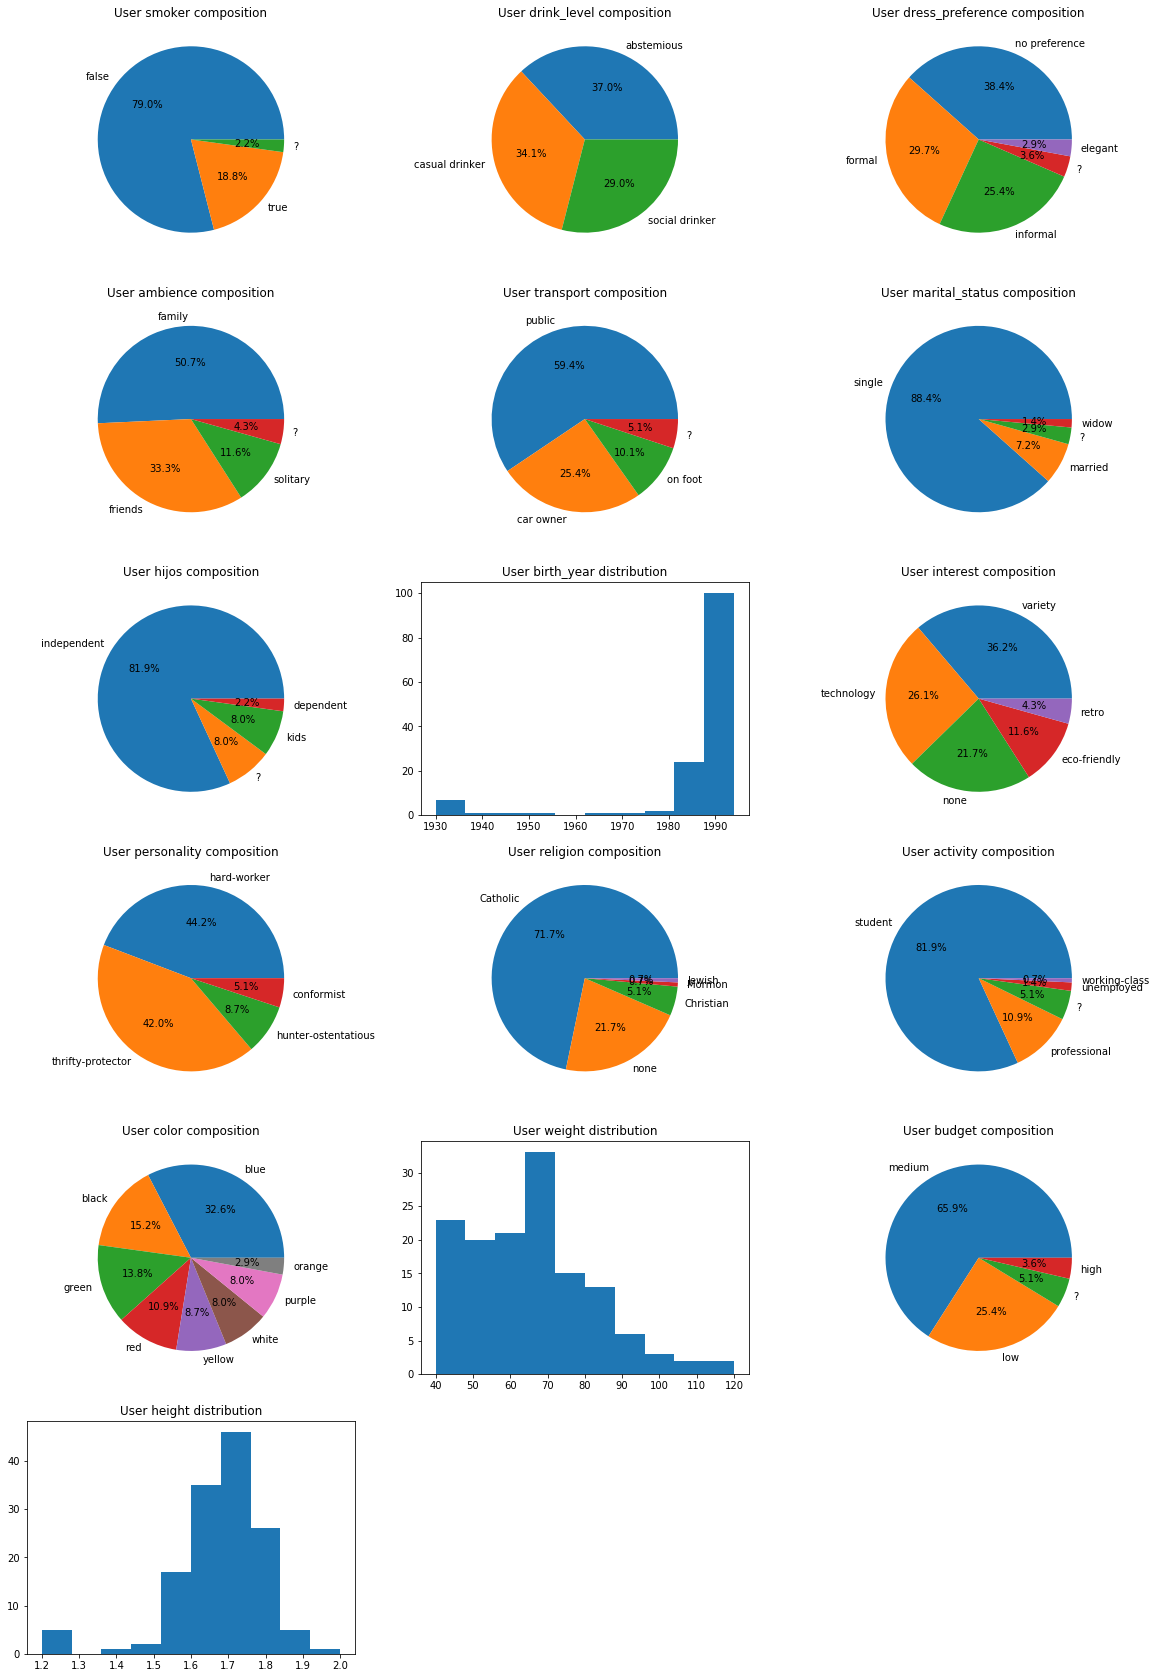

In [4]:
# call visualization function
fig1 = plt.figure('User Profile', figsize = (20, 30))
for i in range(3 , len(kolom_user_profile)):
    plt.subplot(6,3,i-2)
    visualisasi_user_profile(i)
    
plt.show()

By looking above charts, we know that despite of null values, the dataset is consisting several '?' values in some features which considerably that users doesn't want to share their preferences on survey. I'd like to keep the '?' values as it is

---

From Distribution (Histogram) graph, I'd like to check is there any __outlier__ or not using __Boxplot Diagram__.

And later on will be decided if this outlier should be removed or not.

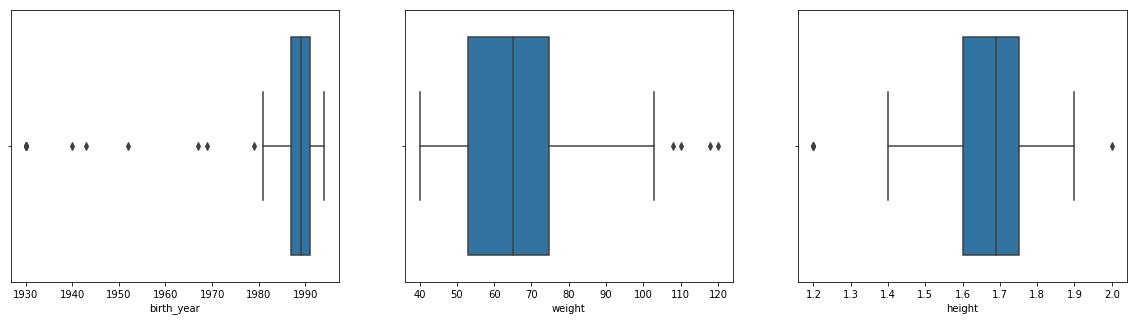

In [5]:
fig2 = plt.figure('Boxplot', figsize = (20,5))
plt.subplot(131)
sns.boxplot(user_profile['birth_year'])
plt.subplot(132)
sns.boxplot(user_profile['weight'])
plt.subplot(133)
sns.boxplot(user_profile['height']);

### A) 2. User Cuisine

In [6]:
user_cuisine = pd.read_csv('datasets/usercuisine.csv')
print(user_cuisine.info())
display(user_cuisine.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
userID      330 non-null object
Rcuisine    330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB
None


,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


There are __330 data observations__ and __2 feature columns__. And there is __no null data values__

In [7]:
print('Total user = {}'.format(user_cuisine['userID'].nunique()))
print('Total type of user-cuisine preferences = {}'.format(len(user_cuisine['Rcuisine'].value_counts())))

Total user = 138
Total type of user-cuisine preferences = 103


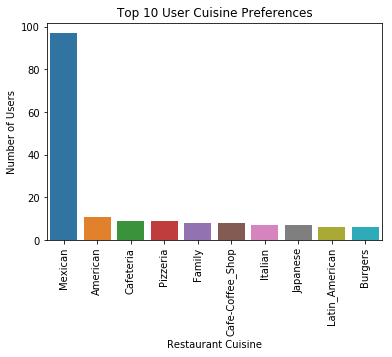

In [8]:
temp2 = user_cuisine['Rcuisine'].value_counts().reset_index().head(10)
temp2.columns = ['Rcuisine', 'number']

sns.barplot(data = temp2, x = 'Rcuisine', y = 'number')
plt.title('Top 10 User Cuisine Preferences')
plt.xlabel('Restaurant Cuisine')
plt.ylabel('Number of Users')
plt.xticks(rotation = 90);

### A) 3. User Payment

In [9]:
user_payment = pd.read_csv('datasets/userpayment.csv')
print(user_payment.info())
display(user_payment.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
userID      177 non-null object
Upayment    177 non-null object
dtypes: object(2)
memory usage: 2.8+ KB
None


,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


There are __177 data observations__ and __2 feature columns__. And there is __no null data values__

In [10]:
print('Total user = {}'.format(user_payment['userID'].nunique()))
print('Total type of user payment preference = {}'.format(len(user_payment['Upayment'].value_counts())))

Total user = 133
Total type of user payment preference = 5


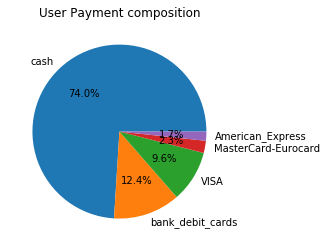

In [11]:
temp3 = user_payment['Upayment'].value_counts().reset_index()
temp3.columns = ['Upayment', 'number']

plt.pie(
    temp3['number'],
    labels = temp3['Upayment'],
    autopct = '%1.1f%%'
)
plt.title('User Payment composition');

## B) Restaurant Related Datasets

### B) 1. Restaurant Profile

In [12]:
resto_profile = pd.read_csv('datasets/geoplaces2.csv')
print(resto_profile.info())
display(resto_profile.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null object
alcohol           130 non-null object
smoking_area      130 non-null object
dress_code        130 non-null object
accessibility     130 non-null object
price             130 non-null object
url               130 non-null object
Rambience         130 non-null object
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(1), object(18)
memory usage: 21.4+ KB
None


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


There are __130 data observations__ and __21 feature columns__, which consist of categorical datas. And there is __no null data values__

---

If we take a look at the dataset, despite of consist of null values, the datasets actually have so much '?' values. On top of that, I consider to eliminate several column features that looks like will be not useful for learning

In [13]:
resto_profile = resto_profile.drop(['the_geom_meter', 'fax', 'zip', 'url'], axis=1)
display(resto_profile.head())

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none
1,132825,22.147392,-100.983092,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,No_Alcohol_Served,none,informal,completely,low,familiar,f,open,none
2,135106,22.149709,-100.976093,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,Wine-Beer,only at bar,informal,partially,medium,familiar,f,open,none
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,No_Alcohol_Served,none,informal,completely,low,familiar,t,closed,none
4,132613,23.752903,-99.165076,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none


---

And if we take a look more deeper, actually we have several duplicate values considerably which have different string characters. I'd like to simplify the datasets by merging the duplicate values

In [14]:
resto_profile['city'] = resto_profile['city'].replace(
    ('san luis potosi', 'san luis potosi ', 'san luis potos', 's.l.p.', 's.l.p', 'slp', '?'),
    'San Luis Potosi'
)
resto_profile['city'] = resto_profile['city'].replace(
    'cuernavaca',
    'Cuernavaca'
)
resto_profile['city'] = resto_profile['city'].replace(
    ('victoria', 'victoria ', 'Cd Victoria', 'Cd. Victoria'),
    'Ciudad Victoria'
)
resto_profile['city'].value_counts()

San Luis Potosi    92
Cuernavaca         16
Ciudad Victoria    16
Jiutepec            4
Soledad             2
Name: city, dtype: int64

In [15]:
resto_profile['state'] = resto_profile['state'].replace(
    ('SLP', 'san luis potosi', 'slp', 'S.L.P.', 'san luis potos', 's.l.p.', '?'),
    'San Luis Potosi'
)
resto_profile['state'] = resto_profile['state'].replace(
    'morelos',
    'Morelos'
)
resto_profile['state'] = resto_profile['state'].replace(
    'tamaulipas',
    'Tamaulipas'
)
resto_profile['state'] = resto_profile['state'].replace(
    'mexico',
    'Mexico'
)
resto_profile['state'].value_counts()

San Luis Potosi    92
Morelos            20
Tamaulipas         16
Mexico              2
Name: state, dtype: int64

In [16]:
resto_profile['country'] = resto_profile['country'].replace(
    ('mexico', '?'),
    'Mexico'
)
resto_profile['country'].value_counts()

Mexico    130
Name: country, dtype: int64

---

Similar like user profile method, in order to visualize 21 feature columns, I'd like to make function to generate all categorical data (Features choose manually) and make the visualization automatically.

In [17]:
# make visualization function
kolom_resto_profile = resto_profile.columns
def visualisasi_resto_profile(i):
    temp = resto_profile[kolom_resto_profile[i]].value_counts().reset_index()
    temp.columns = [kolom_resto_profile[i], 'number']

    plt.pie(
        temp['number'],
        labels = temp[kolom_resto_profile[i]],
        autopct = '%1.1f%%',
#         startangle=90
    )
    plt.title('Resto ' + kolom_resto_profile[i] + ' composition')

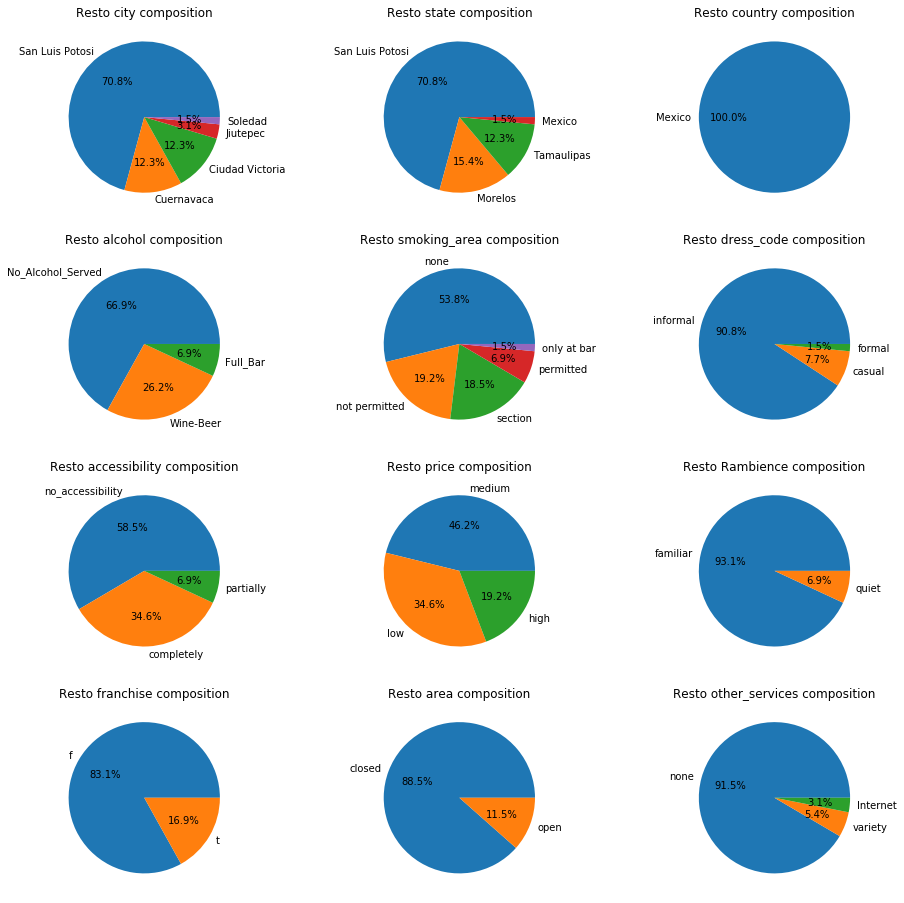

In [18]:
# call visualization function
fig = plt.figure('Resto Profile', figsize = (16, 16))
for i in range(5 , len(kolom_resto_profile)):
    plt.subplot(4,3,i-4)
    visualisasi_resto_profile(i)
    
plt.show()

In [19]:
import csv
resto_profile.to_csv('datasets/resto_profile.csv', index = False)

### B) 2. Restaurant Cuisine

In [20]:
cuisine = pd.read_csv('datasets/chefmozcuisine.csv')
print(cuisine.info())
display(cuisine.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB
None


,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


There are __916 data observations__ and __2 feature columns__. And there is __no null data values__

In [21]:
print('Total restaurant = {}'.format(cuisine['placeID'].nunique()))
print('Total type of resto cuisine = {}'.format(len(cuisine['Rcuisine'].value_counts())))

Total restaurant = 769
Total type of resto cuisine = 59


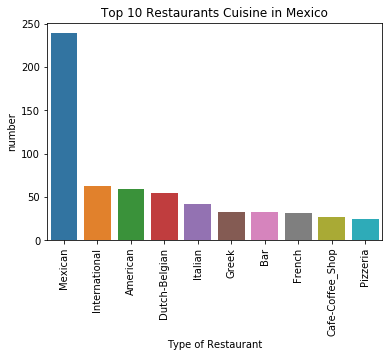

In [22]:
temp4 = cuisine['Rcuisine'].value_counts().reset_index().head(10)
temp4.columns = ['Rcuisine', 'number']

sns.barplot(data = temp4, x = 'Rcuisine', y = 'number')
plt.title('Top 10 Restaurants Cuisine in Mexico')
plt.xlabel('Type of Restaurant')
plt.xticks(rotation = 90);

### B) 3. Restaurant Payment Acceptance

In [23]:
accept = pd.read_csv('datasets/chefmozaccepts.csv')
print(accept.info())
display(accept.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB
None


,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


There are __1314 data observations__ and __2 feature columns__. And there is __no null data values__

In [24]:
print('Total restaurant = {}'.format(accept['placeID'].nunique()))
print('Total type of resto payment acceptance = {}'.format(len(accept['Rpayment'].value_counts())))

Total restaurant = 615
Total type of resto payment acceptance = 12


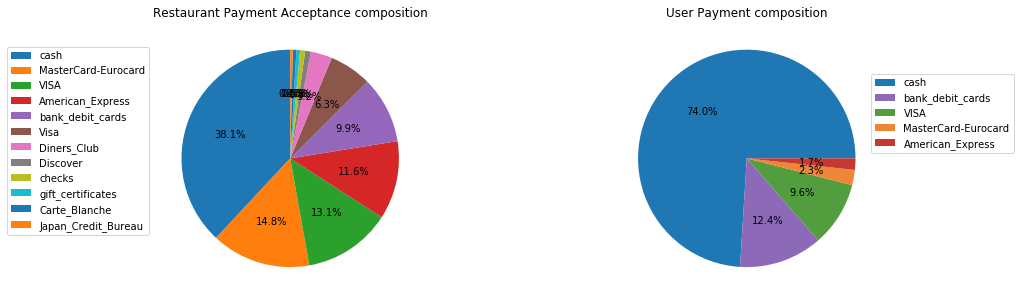

In [25]:
temp5 = accept['Rpayment'].value_counts().reset_index()
temp5.columns = ['Rpayment', 'number']

fig3 = plt.figure('Payment Comparison', figsize=(15,5))

plt.subplot(121)
plt.pie(
    temp5['number'],
#     labels = temp5['Rpayment'],
    autopct = '%1.1f%%',
    startangle=90
)
plt.title('Restaurant Payment Acceptance composition')
plt.legend(labels = temp5['Rpayment'], loc = 'lower right', bbox_to_anchor=(0,0.2))

plt.subplot(122)
plt.pie(
    temp3['number'],
#     labels = temp3['Upayment'],
    autopct = '%1.1f%%',
    colors= ['#1f77b4', '#8C6AB7', '#529D3E', '#EE8537', '#C63932']
)
plt.title('User Payment composition')
plt.legend(labels = temp3['Upayment'], loc = 'lower right', bbox_to_anchor=(1.5,0.5))
plt.tight_layout;

### B) 4. Restaurant Parking Lot Facility

In [26]:
park = pd.read_csv('datasets/chefmozparking.csv')
print(park.info())
display(park.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB
None


,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


There are __702 data observations__ and __2 feature columns__. And there is __no null data values__

In [27]:
print('Total restaurant = {}'.format(park['placeID'].nunique()))
print('Total type of resto parking facilities = {}'.format(len(park['parking_lot'].value_counts())))

Total restaurant = 675
Total type of resto parking facilities = 7


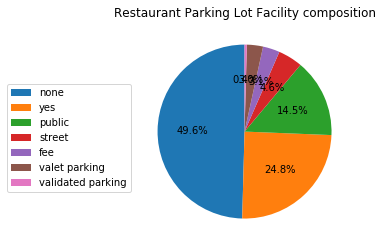

In [28]:
temp6 = park['parking_lot'].value_counts().reset_index()
temp6.columns = ['parking_lot', 'number']

plt.pie(
    temp6['number'],
#     labels = temp6['parking_lot'],
    autopct = '%1.1f%%',
    startangle=90
)
plt.title('Restaurant Parking Lot Facility composition')
plt.legend(labels = temp6['parking_lot'], loc = 'lower right', bbox_to_anchor=(0,0.2));

### B) 5. Restaurant Open Days

In [29]:
day = pd.read_csv('datasets/chefmozhours4.csv')
print(day.info())
display(day.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB
None


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


There are __2.339 data observations__ and __2 feature columns__. And there is __no null data values__

In [30]:
print('Total restaurant = {}'.format(day['placeID'].nunique()))
print('Total type of resto open hours = {}'.format(len(day['hours'].value_counts())))
print('Total type of resto open days = {}'.format(len(day['days'].value_counts())))

Total restaurant = 694
Total type of resto open hours = 273
Total type of resto open days = 3


In [31]:
print('Total restaurant = {}'.format(day['placeID'].nunique()))
print('Total type of resto open hours = {}'.format(len(day['hours'].value_counts())))
print('Total type of resto open days = {}'.format(len(day['days'].value_counts())))

Total restaurant = 694
Total type of resto open hours = 273
Total type of resto open days = 3


Due to hours have 273 categorical and there are some duplicate values then we need to clean it 

In [32]:
day = day.drop(['hours'], axis = 1)
day = day.drop_duplicates()

In [33]:
day = day.groupby(['days']).count()
day

,placeID
days,
Mon;Tue;Wed;Thu;Fri;,692
Sat;,689
Sun;,680


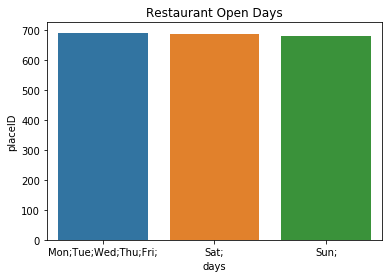

In [34]:
sns.barplot(day.index, day['placeID'])
plt.title('Restaurant Open Days');

By above chart we know that almost all restaurant in Mexico have open Days everyday

In [35]:
# var_x = []
# for i in range(len(day['hours'])):
#     simpan = day['hours'][i].replace(':', '-').replace(';', '-').split('-')
# #     print(simpan)
#     ubah = []
#     for j in range(len(simpan)):
#         if j == len(simpan) - 1:
#             pass
#         else:
#             ubah.append(int(simpan[j]))
        
#         if j == 2:
#             if ubah[j] == 0:
#                 ubah[j] = 24
#             else:
#                 ubah[j] = ubah[j]
                
# #     var_x.append(ubah)
# #     print(ubah[0])
# #     day['open'][i] = ubah[0]
# # print(var_x)
    
#     if ubah[0] < 12:
#         day['open'][i] = 'Morning'
#     if ubah[0] < 17:
#         day['open'][i] = 'Afternoon'
#     if ubah[0] <= 24:
#         day['open'][i] = 'Night'

#     if ubah[2] < 12:
#         day['close'][i] = 'morning'
#     if ubah[2] < 17:
#         day['close'] = 'Afternoon'
#     if ubah[2] <= 24:
#         day['close'] = 'Night'
        
    
# #     if ubah[0] <= 12 and ubah[2] >= 22:
# #         hour['kategori'][i] = 'Full Day'
# #     elif ubah[0] >= 16 and ubah[2] <= 24:
# #         hour['kategori'][i] = 'After Office Hour'
# #     elif ubah[0] < 16 and ubah[2] <= 24:
# #         hour['kategori'][i] = 'Lunch Till Drop'
# #     else:
# #         hour['kategori'][i] = 'Mid-night Wake-up'

In [56]:
rating = pd.read_csv('datasets/rating_final.csv')
print(rating.info())
display(rating.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
dtypes: int64(4), object(1)
memory usage: 45.4+ KB
None


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


# Content Based-Filtering with Cosine Similarity

## A) Set Up The Recommender Criterias

Dataset geoplaces2.csv will became the main dataset that I use to fit the recommendation system. I consider __7 criterias__ which later on will become the main features to get restaurant recommendation:
1. __Alcohol__
2. __Smoking Area__
3. __Dress Code__
4. __Price__
5. __Ambience__
6. __Area__

In [36]:
resto_profile['criteria'] = resto_profile['city'].str.cat(
    resto_profile[['alcohol', 'smoking_area', 'dress_code', 'price', 'Rambience', 'area']],
    sep = ' '
)

In [37]:
resto_profile.head()

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,criteria
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...
1,132825,22.147392,-100.983092,puesto de tacos,esquina santos degollado y leon guzman,San Luis Potosi,San Luis Potosi,Mexico,No_Alcohol_Served,none,informal,completely,low,familiar,f,open,none,San Luis Potosi No_Alcohol_Served none informa...
2,135106,22.149709,-100.976093,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,Wine-Beer,only at bar,informal,partially,medium,familiar,f,open,none,San Luis Potosi Wine-Beer only at bar informal...
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,calle emilio portes gil,Ciudad Victoria,Tamaulipas,Mexico,No_Alcohol_Served,none,informal,completely,low,familiar,t,closed,none,Ciudad Victoria No_Alcohol_Served none informa...
4,132613,23.752903,-99.165076,carnitas_mata,lic. Emilio portes gil,Ciudad Victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none,Ciudad Victoria No_Alcohol_Served permitted in...


In [38]:
# count criterias
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer(
    tokenizer = lambda i: i.split(' '),    # => cari split karakter yg unik
    analyzer = 'word'
)
matrix_criteria = model.fit_transform(resto_profile['criteria'])
tipe_criteria = model.get_feature_names()
jumlah_criteria = len(tipe_criteria)
event_criteria = matrix_criteria.toarray()

In [39]:
print(tipe_criteria)

['at', 'bar', 'casual', 'ciudad', 'closed', 'cuernavaca', 'familiar', 'formal', 'full_bar', 'high', 'informal', 'jiutepec', 'low', 'luis', 'medium', 'no_alcohol_served', 'none', 'not', 'only', 'open', 'permitted', 'potosi', 'quiet', 'san', 'section', 'soledad', 'victoria', 'wine-beer']


In [40]:
print(jumlah_criteria)

28


In [41]:
print(event_criteria)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## B) Make The Cosine Similarity Score

In [42]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
score = cosine_similarity(matrix_criteria)
score

array([[1.        , 0.50395263, 0.34188173, ..., 0.35856858, 0.71428571,
        0.62994079],
       [0.50395263, 1.        , 0.60302269, ..., 0.42163702, 0.62994079,
        0.88888889],
       [0.34188173, 0.60302269, 1.        , ..., 0.57207755, 0.22792115,
        0.50251891],
       ...,
       [0.35856858, 0.42163702, 0.57207755, ..., 1.        , 0.23904572,
        0.52704628],
       [0.71428571, 0.62994079, 0.22792115, ..., 0.23904572, 1.        ,
        0.75592895],
       [0.62994079, 0.88888889, 0.50251891, ..., 0.52704628, 0.75592895,
        1.        ]])

## C) Make Machine Learning Prediction

Make a dummy dataframe to process categorical datas which in criteria features

In [43]:
resto_profile_dummy = pd.get_dummies(
    resto_profile,
    columns = ['city', 'alcohol', 'smoking_area', 'dress_code', 'price', 'Rambience', 'area'],
    drop_first = True
)
display(resto_profile_dummy.head())

,placeID,latitude,longitude,name,address,state,country,accessibility,franchise,other_services,...,smoking_area_not permitted,smoking_area_only at bar,smoking_area_permitted,smoking_area_section,dress_code_formal,dress_code_informal,price_low,price_medium,Rambience_quiet,area_open
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Morelos,Mexico,no_accessibility,f,none,...,0,0,0,0,0,1,0,1,0,0
1,132825,22.147392,-100.983092,puesto de tacos,esquina santos degollado y leon guzman,San Luis Potosi,Mexico,completely,f,none,...,0,0,0,0,0,1,1,0,0,1
2,135106,22.149709,-100.976093,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,Mexico,partially,f,none,...,0,1,0,0,0,1,0,1,0,1
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,calle emilio portes gil,Tamaulipas,Mexico,completely,t,none,...,0,0,0,0,0,1,1,0,0,0
4,132613,23.752903,-99.165076,carnitas_mata,lic. Emilio portes gil,Tamaulipas,Mexico,completely,t,none,...,0,0,1,0,0,1,0,1,0,0


---

Define the independent and dependent variables

In [44]:
X = resto_profile_dummy.drop(
    ['placeID', 'latitude', 'longitude', 'name', 'address', 'state', 'country', 'accessibility',
    'franchise', 'other_services', 'criteria'], axis = 1
)
display(X.head())

,city_Cuernavaca,city_Jiutepec,city_San Luis Potosi,city_Soledad,alcohol_No_Alcohol_Served,alcohol_Wine-Beer,smoking_area_not permitted,smoking_area_only at bar,smoking_area_permitted,smoking_area_section,dress_code_formal,dress_code_informal,price_low,price_medium,Rambience_quiet,area_open
0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1
2,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [45]:
y = resto_profile_dummy['name']
display(y.head())

0                   Kiku Cuernavaca
1                   puesto de tacos
2        El Rinc�n de San Francisco
3    little pizza Emilio Portes Gil
4                     carnitas_mata
Name: name, dtype: object

---

Time to proceed the Machine Learning, I'd like to try several Classifier Machine Learning method and then compare the accuracy score and its prediction results.

In this case, I __don't split the datas for train and test__ due to I want this ML can train 100% from this resto_profile dataset, and the prediction later on will be coming from other users.

For now, let this ML predict the restaurant Name from the following criterias:
1. __City = Cuernavaca__
2. __Alcohol = No_Alcohol_Served__
3. __Smoking Area = none__
4. __Dresscode = informal__
5. __Price = medium__
6. __Ambience = familiar__
7. __Area = closed__

In [46]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
log_reg.fit(X, y)

# scoring model
print('Accuracy = {}%'.format(round(log_reg.score(X, y) * 100, 2)))

# prediction
print(log_reg.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0])

Accuracy = 40.77%
Arrachela Grill


In [47]:
# kernel svm model
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma = 0.5)
svm.fit(X, y)

# scoring model
print('Accuracy = {}%'.format(round(svm.score(X, y) * 100, 2)))

# prediction
print(svm.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0])

Accuracy = 40.77%
Restaurant los Pinos


In [48]:
# naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)

# scoring model
print('Accuracy = {}%'.format(round(gnb.score(X, y) * 100, 2)))

# prediction
print(gnb.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0])

Accuracy = 43.08%
Arrachela Grill


In [49]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dct_clf = DecisionTreeClassifier(criterion = 'entropy')
dct_clf.fit(X, y)

# scoring model
print('Accuracy = {}%'.format(round(dct_clf.score(X, y) * 100, 2)))

# prediction
print(dct_clf.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0])

Accuracy = 43.08%
Arrachela Grill


In [50]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy')
rf_clf.fit(X, y)

# scoring model
print('Accuracy = {}%'.format(round(rf_clf.score(X, y) * 100, 2)))

# prediction
print(rf_clf.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0])

Accuracy = 43.08%
Arrachela Grill


---

From all of classifier methods, looks like the __accuracy score still below < 50%__, and based on the prediction it gives 3 different names of Restaurant:
1. __Kiku Cuernavaca__
2. __Arrachela Grill__
3. __Restaurant los Pinos__

We would check if those Restaurants have same criterias with our input before

In [51]:
display(resto_profile[resto_profile['name'] == 'Kiku Cuernavaca'])
display(resto_profile[resto_profile['name'] == 'Arrachela Grill'])
display(resto_profile[resto_profile['name'] == 'Restaurant los Pinos'])

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,criteria
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...


,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,criteria
71,135016,18.869347,-99.209944,Arrachela Grill,69 Tres De Mayo,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...


,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,criteria
51,135000,18.870565,-99.226938,Restaurant los Pinos,Federal Mexico - Acapulco 10 3 de Mayo,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...


## D) Get The Recommendation System from Prediction

From the prediction (I choose Random Forest Classifier), then we can get the top 5 restaurant recommendation which has cosine similarity > 75%

In [52]:
# test model
resto_fav = rf_clf.predict([[1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0]])[0]
# resto_fav = 'Kiku Cuernavaca'
display(resto_profile[resto_profile['name'] == resto_fav])

# take the index from resto_fav
index_fav = resto_profile[resto_profile['name'] == resto_fav].index.values[0]
# print(index_fav)

# list all restuarants + cosine similarity score
all_resto = list(enumerate(score[index_fav]))
# print(all_resto)

# show similar restaurant, sorted by score
resto_similar = sorted(
    all_resto,
    key = lambda i: i[1],
    reverse = True
)
# print(resto_similar)

,placeID,latitude,longitude,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,criteria
71,135016,18.869347,-99.209944,Arrachela Grill,69 Tres De Mayo,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,Cuernavaca No_Alcohol_Served none informal med...


In [53]:
# list all resto filter by cosine similarity score > 80%
resto_recom = []
for i in resto_similar:
    if i[1] > 0.8:
        resto_recom.append(i)
    else:
        pass

# show 5 datas randomly
import random
rekomendasi = random.choices(resto_recom, k = 5)

for i in rekomendasi:
    print('Resto = {} | City = {} | Alcohol = {} | Smoking Area = {} | Dress Code = {} | Price = {} | Ambience = {} | Area = {}'.format(
        resto_profile.iloc[i[0]]['name'],
        resto_profile.iloc[i[0]]['city'],
        resto_profile.iloc[i[0]]['alcohol'],
        resto_profile.iloc[i[0]]['smoking_area'],
        resto_profile.iloc[i[0]]['dress_code'],
        resto_profile.iloc[i[0]]['price'],
        resto_profile.iloc[i[0]]['Rambience'],
        resto_profile.iloc[i[0]]['area'])
    )

# list_rekom = []
# for i in rekomendasi:
#     list_rekom.append([
#         resto_profile.iloc[i[0]]['name'],
#         resto_profile.iloc[i[0]]['city'],
#         resto_profile.iloc[i[0]]['alcohol'],
#         resto_profile.iloc[i[0]]['smoking_area'],
#         resto_profile.iloc[i[0]]['dress_code'],
#         resto_profile.iloc[i[0]]['price'],
#         resto_profile.iloc[i[0]]['Rambience'],
#         resto_profile.iloc[i[0]]['area']]
#     )
# print(list_rekom)

Resto = Vips | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed
Resto = la perica hamburguesa | City = Ciudad Victoria | Alcohol = No_Alcohol_Served | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed
Resto = Chilis Cuernavaca | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed
Resto = Mikasa | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed
Resto = Vips | City = Cuernavaca | Alcohol = Wine-Beer | Smoking Area = none | Dress Code = informal | Price = medium | Ambience = familiar | Area = closed


### Save Random Forest Classifier Model

In [55]:
import joblib
joblib.dump(rf_clf,'model_restaurant')

['model_restaurant']